# EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [2]:
##LOAD PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [3]:
loanData = pd.read_csv("DM1 Project/Raw Data/SBAnational.csv")

<ipython-input-3-77f640a728d9>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  loanData = pd.read_csv("DM1 Project/Raw Data/SBAnational.csv")


In [4]:
loanData.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"


In [5]:
loanData.shape

(899164, 27)

In [6]:
#describe dataset
loanData.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [7]:
#find number of NA values
loanData.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [8]:
loanData.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [9]:
#Unique values
loanData.apply(lambda x: (len(x.unique()),x.unique()))

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,899164,779584,32582,52,33611,5803,57,1312,9859,70,...,19,9,6449,8473,118859,15,3,83165,22128,38326
1,"[1000014003, 1000024006, 1000034009, 100004400...","[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...","[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...","[IN, OK, FL, CT, NJ, NC, IL, RI, TX, VA, TN, A...","[47711, 46526, 47401, 74012, 32801, 6062, 7083...","[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...","[OH, IN, OK, FL, DE, SD, AL, CT, GA, OR, MN, R...","[451120, 722410, 621210, 0, 332721, 811118, 72...","[28-Feb-97, 2-Jun-80, 7-Feb-06, 11-Jun-80, 4-O...","[1997, 1980, 2006, 1998, 1999, 2000, 2001, 197...",...,"[N, 0, Y, T, nan, `, ,, 1, C, 3, 2, R, 7, A, 5...","[Y, N, C, 1, nan, S, R, A, 0]","[nan, 24-Jun-91, 18-Apr-02, 4-Oct-89, 26-Jun-1...","[28-Feb-99, 31-May-97, 31-Dec-97, 30-Jun-97, 1...","[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...","[$0.00 , $12,750.00 , $827,875.00 , $25,000.00...","[P I F, CHGOFF, nan]","[$0.00 , $208,959.00 , $14,084.00 , $44,374.00...","[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...","[$48,000.00 , $32,000.00 , $215,250.00 , $28,0..."


#### MIS_STATUS

CHGOFF: A charged off loan is usually considered to be in default
PIF: This status indicates that the borrower has successfully repaid the entire outstanding balance of the loan, including any interest and fees.

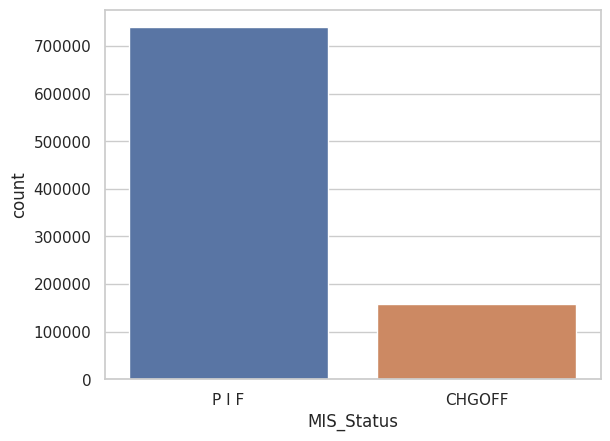

In [10]:
# distribution of defaulted loans and PIF loans
sns.set_theme(style="whitegrid")
sns.countplot(x = loanData['MIS_Status'])
plt.show()

In [11]:
#changing MIS_STATUS to 0 if CHGOFF AND 1 if PIF
loanData['MIS_Status'] = loanData['MIS_Status'].replace('P I F', 1)
loanData['MIS_Status'] = loanData['MIS_Status'].replace('CHGOFF', 0)
loanData['MIS_Status'].unique()

array([ 1.,  0., nan])

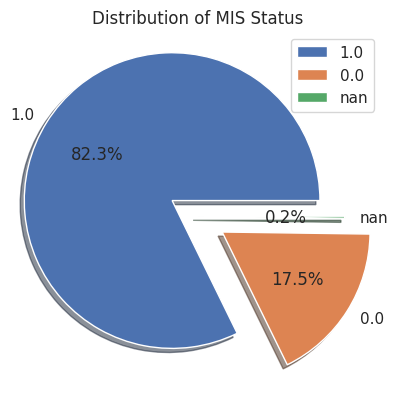

In [12]:
status_counts = loanData['MIS_Status'].value_counts(dropna=False)
myexplode = [0.2, 0.2, 0]
plt.pie(status_counts, labels=status_counts.index.astype(str), autopct='%1.1f%%', explode = myexplode, shadow = True)

plt.title('Distribution of MIS Status')
plt.legend()
plt.show()

In [13]:
loanData['MIS_Status'].isna().sum()

1997

In [14]:
loanData = loanData[loanData['MIS_Status'].notna()]

In [15]:
loanData['MIS_Status'].unique()

array([1., 0.])

In [16]:
loanData['MIS_Status'].dtype

dtype('float64')

#### DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv

For all these columns: 
DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv the "$" symbol needs to be removed.

In [17]:
def preprocessingAmountValues(colname):
  loanData[colname] = loanData[colname].astype(str).str.replace('$', '').str.replace(',', '')
  loanData[colname] = loanData[colname].astype(float)


preprocessingAmountValues("DisbursementGross")
preprocessingAmountValues("BalanceGross")
preprocessingAmountValues("ChgOffPrinGr")
preprocessingAmountValues("GrAppv")
preprocessingAmountValues("SBA_Appv")

<ipython-input-17-9d60a16fb5cf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loanData[colname] = loanData[colname].astype(str).str.replace('$', '').str.replace(',', '')


#### ApprovalFY

In [18]:
#Type supposed to be integer
loanData['ApprovalFY'].dtype

dtype('O')

In [19]:
#dropping ApprovalFY = '1976A' as these rows are very less in comparison to the whole dataframe
loanData = loanData.drop(loanData[loanData['ApprovalFY'] == '1976A'].index)

In [20]:
loanData['ApprovalFY'] = loanData['ApprovalFY'].astype(int)

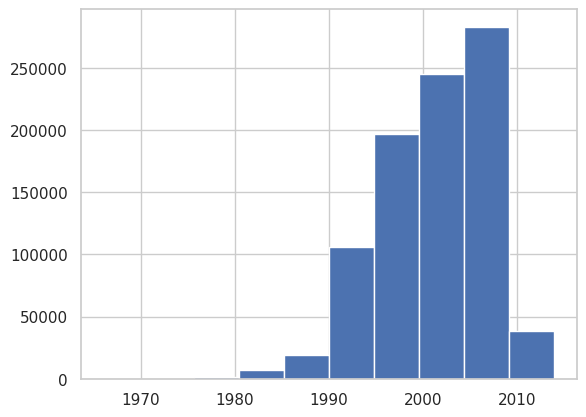

In [21]:
loanData['ApprovalFY'].hist()
plt.show()

In [22]:
#copy of the dataset
loanData_copy= loanData.copy()

In [23]:
loanData_copy.drop(columns=['LoanNr_ChkDgt', 'ApprovalDate','DisbursementDate', 'ChgOffDate'], inplace=True)
loanData_copy.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

In [24]:
col = loanData_copy.pop("MIS_Status")
loanData_copy.insert(len(loanData_copy.columns), 'MIS_Status', col)


In [25]:
loanData_copy.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv', 'MIS_Status'],
      dtype='object')

In [26]:
#transforming the categorical data into numerical ones for correlation matrix

from sklearn.preprocessing import LabelEncoder
cat_cols = ['Name','City', 'Zip', 'State','Bank','BankState', 'RevLineCr', 'LowDoc', 'MIS_Status','DisbursementGross', 'BalanceGross', 'GrAppv','SBA_Appv', 'ApprovalFY']
le = LabelEncoder()
for col in cat_cols:
    loanData_copy[col] = le.fit_transform(loanData_copy[col])

<Axes: >

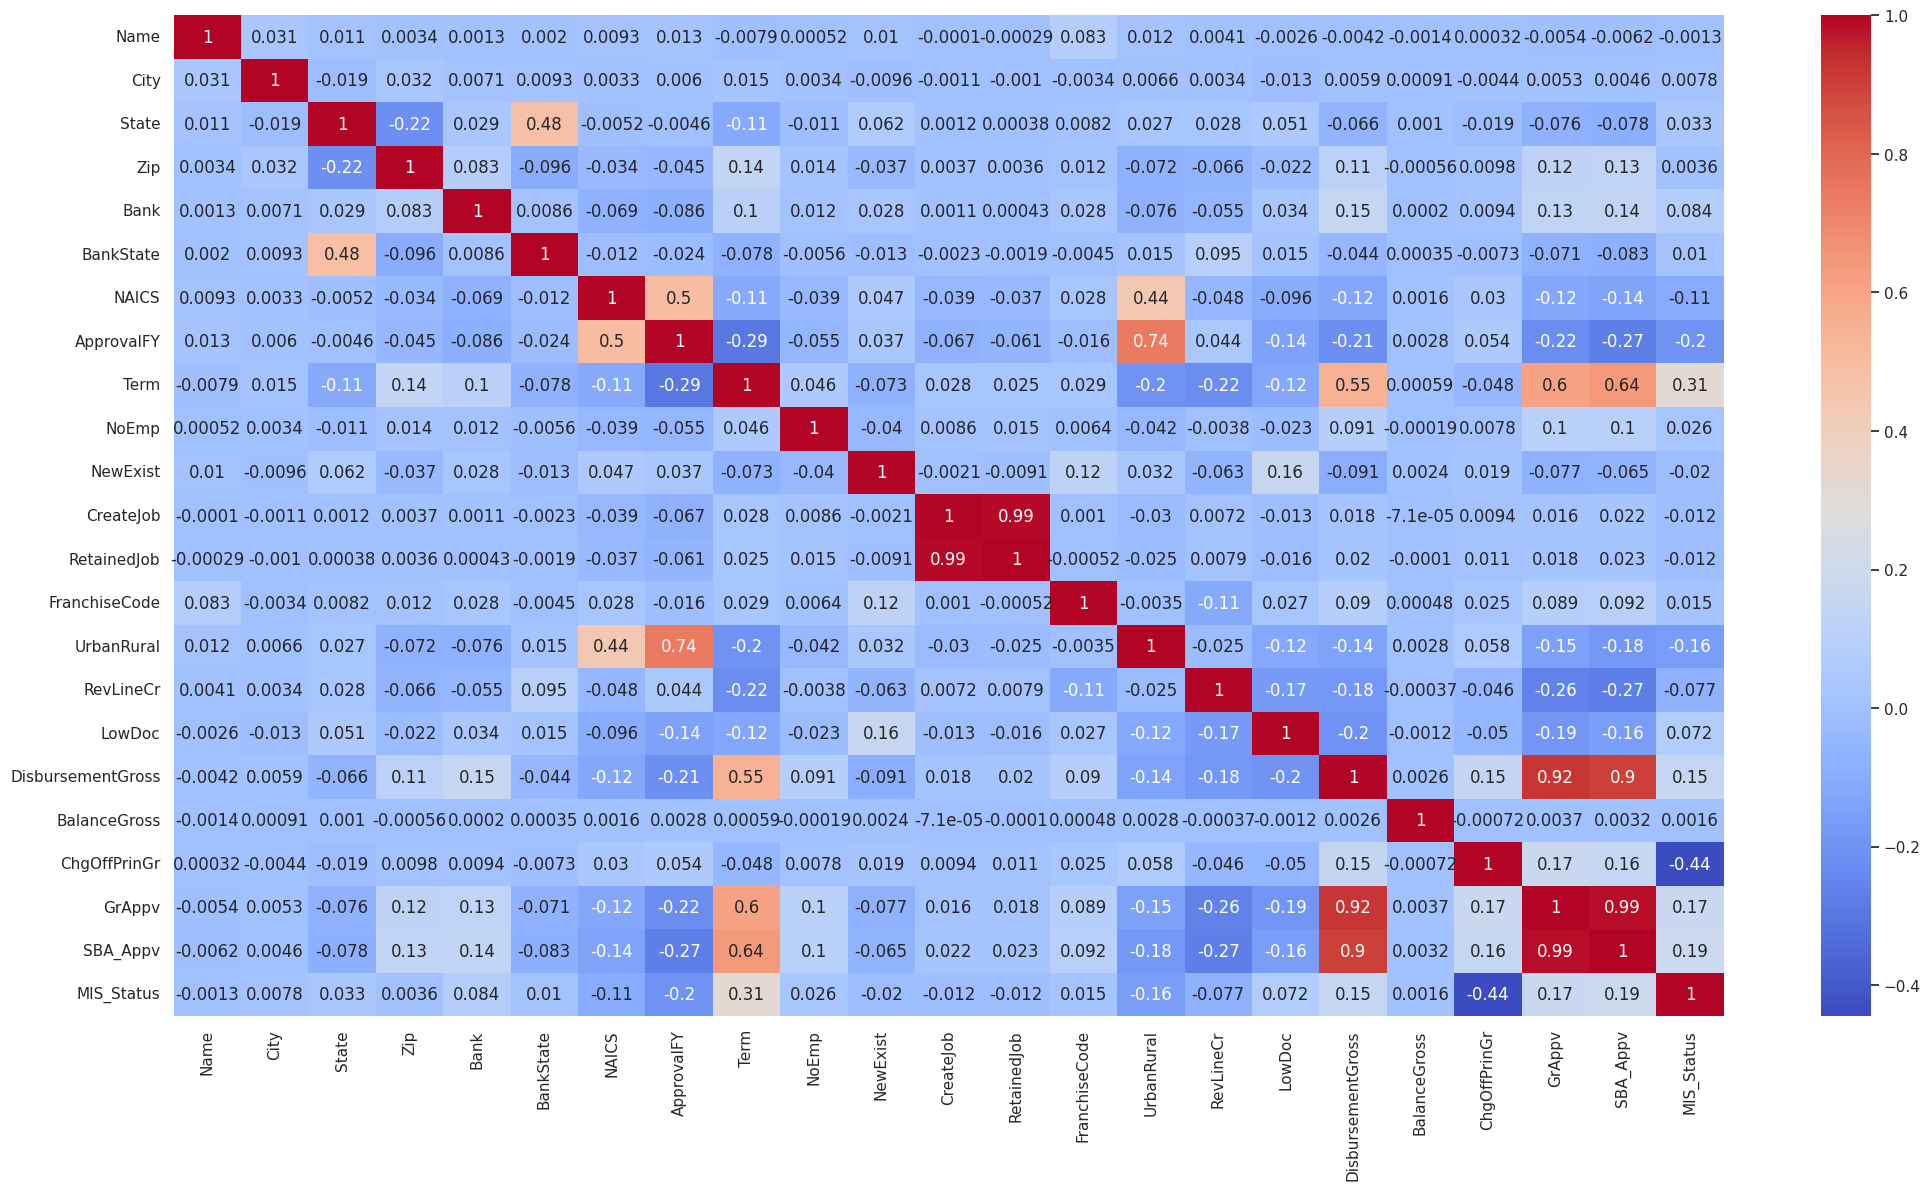

In [27]:
#correlation matrix

corr_matrix = loanData_copy.corr()
plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: >

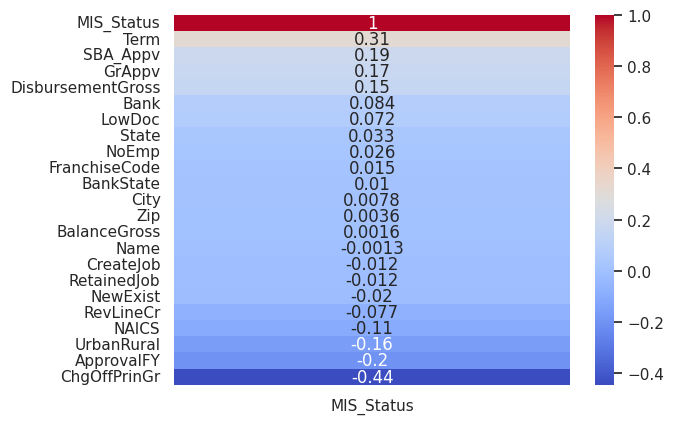

In [28]:
#Checking the Correlation of every variable with "MIS_Status"

target_var = 'MIS_Status'
corr_matrix = loanData_copy.corr()[[target_var]]
corr_matrix = corr_matrix.sort_values(by=target_var, ascending=False)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### Boxplot and Histogram analysis

<ipython-input-29-0749f1f07c33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-29-0749f1f07c33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-29-0749f1f07c33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-29-0749f1f07c33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-29-0749f1f07c33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-29-0749f1f07c33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

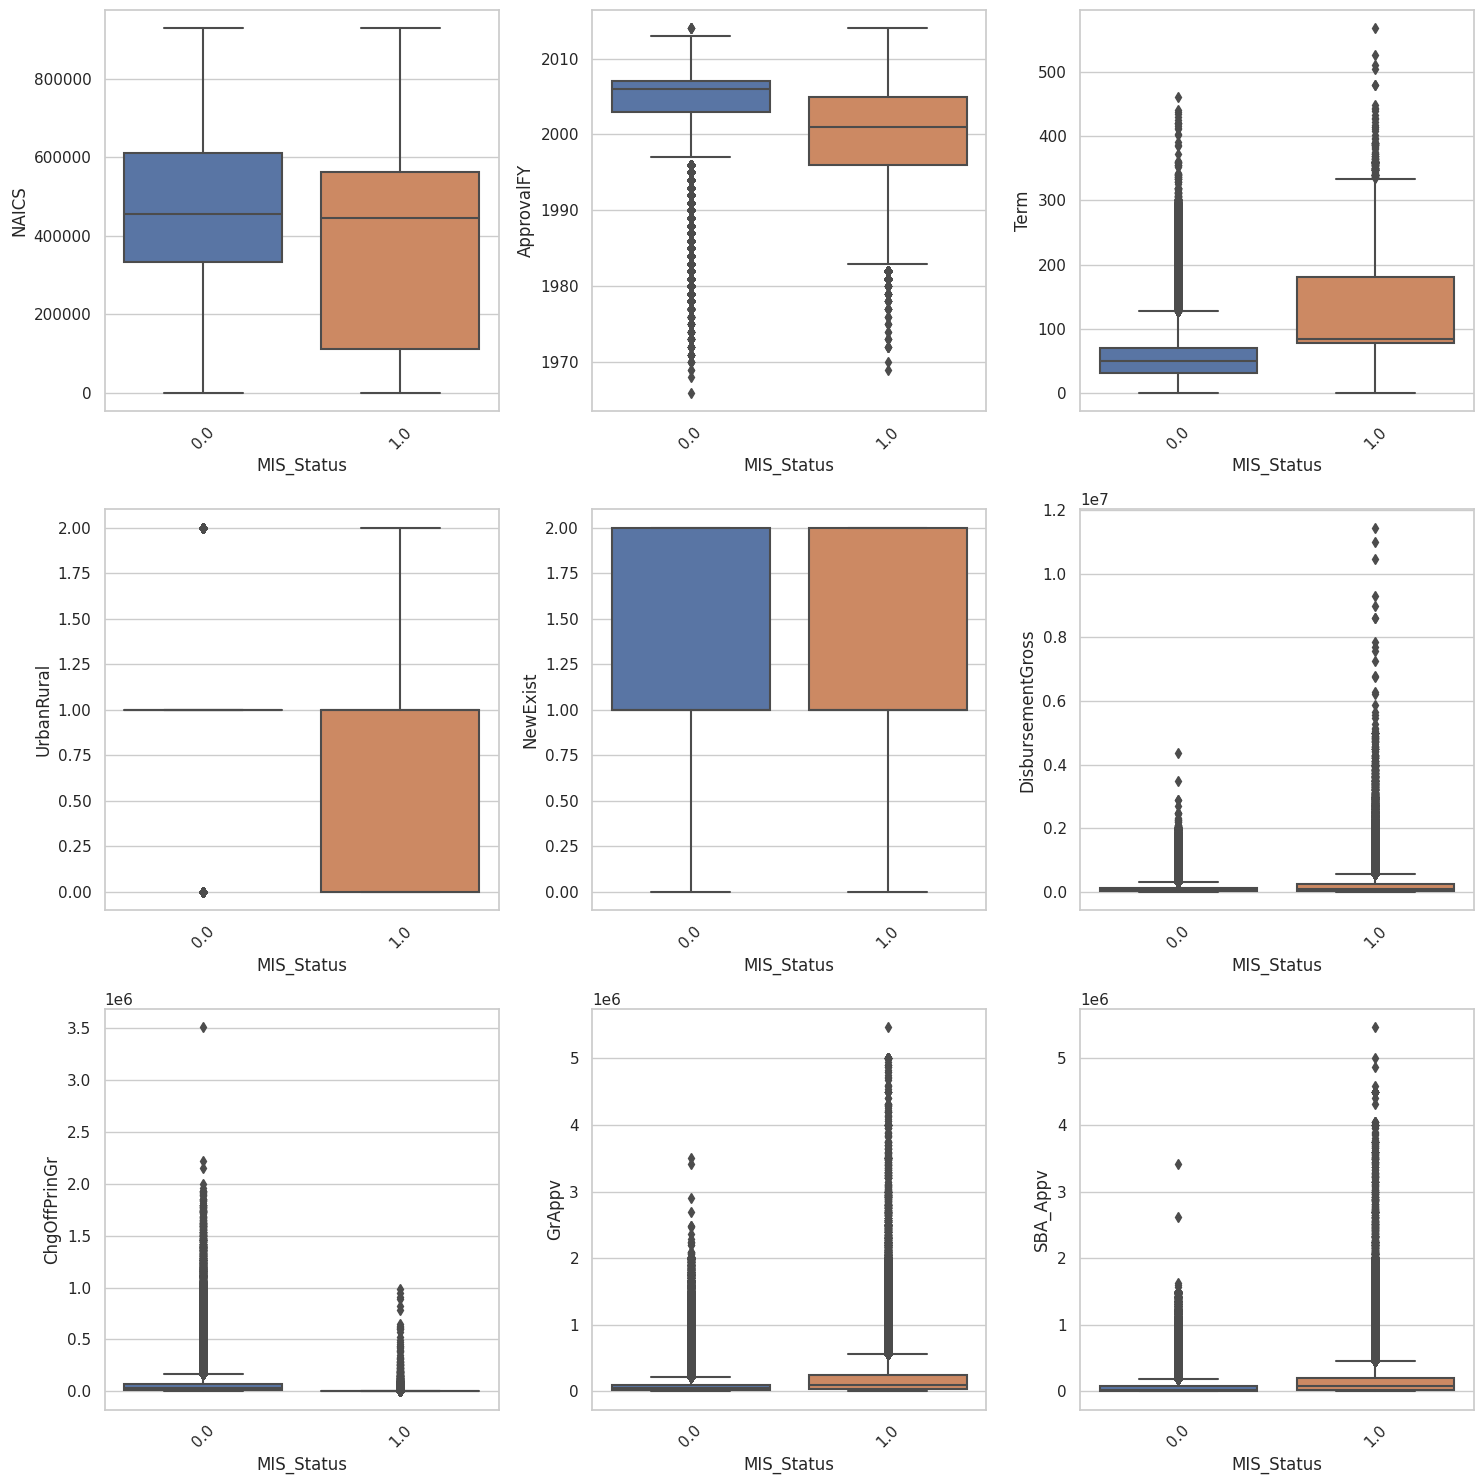

In [29]:
loanData_numerical = list(loanData.select_dtypes(include = ['float64', 'int64']))
loanData_num = loanData[['NAICS','ApprovalFY','Term','UrbanRural','NewExist','DisbursementGross','ChgOffPrinGr','GrAppv','SBA_Appv','MIS_Status']]

loanData_num.head()

fig, axes = plt.subplots(round(len(loanData_numerical) / 5), 3, figsize=(15, 15))

for i, ax in enumerate(fig.axes):
    if i < len(loanData_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(x='MIS_Status', y=loanData_num.columns[i], data=loanData_num, ax=ax)
fig.tight_layout()

***INSIGHTS:***

* There is a large number of null values that still needs to be handled.

* **ApprovalFY** appears to have outliers; most of the committments were done after the year 1990.

* **Term**, **DisbursementGross**, **ChgOffPrinGr**, **GrAppv**, **SBA_Appv** all appear to have a distribution highly concentrated on a specific range of values and to have a large number of visible outliers that need to be handled as well.



#### Dealing with dates

Converting the date columns to appropriate format, to find out the duration between two dates: when it was approved and when it was disbursed.

Analyzing the difference between the approval date and disbursement date in a loan dataframe provides valuable information about the loan process efficiency, financial stability, cash flow management, and loan utilization of small businesses. 

Making another column 'Corrected_AppDate', 'Corrected_DisbDate' and specifying the format as the conversion to datetime would follow Y2K format and it would convert 72 as 2072 instead of 1972.

In [30]:
loanData['Corrected_AppDate'] = pd.to_datetime(loanData['ApprovalDate'], format='%d-%b-%y')
loanData['Corrected_DisbDate'] = pd.to_datetime(loanData['DisbursementDate'], format = '%d-%b-%y')

In [31]:
loanData[loanData['LoanNr_ChkDgt']==3675371004][['ApprovalDate','Corrected_AppDate','DisbursementDate','Corrected_DisbDate']]

,ApprovalDate,Corrected_AppDate,DisbursementDate,Corrected_DisbDate
380551,5-Dec-72,1972-12-05,3-Jan-73,1973-01-03


In [32]:
loanData['DisbursementDuration_days'] = (loanData['Corrected_DisbDate']-loanData['Corrected_AppDate']).dt.days

In [33]:
print("Minimum duration", loanData['DisbursementDuration_days'].min())
print("Maximum duration", loanData['DisbursementDuration_days'].max())

Minimum duration -36351.0
Maximum duration 24132.0


 Another anomaly detected! For some rows the disbursement date is much behind than the approval date


In [34]:
loanData[loanData['DisbursementDuration_days']<0][['ApprovalDate','Corrected_AppDate','DisbursementDate','Corrected_DisbDate','DisbursementDuration_days']].head()

,ApprovalDate,Corrected_AppDate,DisbursementDate,Corrected_DisbDate,DisbursementDuration_days
481,25-Jun-80,1980-06-25,12-May-80,1980-05-12,-44.0
1548,5-Mar-97,1997-03-05,28-Feb-97,1997-02-28,-5.0
1655,5-Mar-97,1997-03-05,28-Feb-97,1997-02-28,-5.0
6907,19-Mar-97,1997-03-19,14-Feb-97,1997-02-14,-33.0
13804,4-Apr-97,1997-04-04,4-Jul-96,1996-07-04,-274.0


In [35]:
#Removing these rows
loanData = loanData[loanData['DisbursementDuration_days'] > 0]

#### NAICS

The first two digits express general industry hence we can reduce each value to the first two numbers, in order to get a general view of the industry

In [36]:
loanData['NAICS'].isna().sum()

0

In [37]:
loanData['NAICS'] = loanData['NAICS'].apply(lambda x : str(x)[:2])

In [38]:
industry_dict = {
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
}

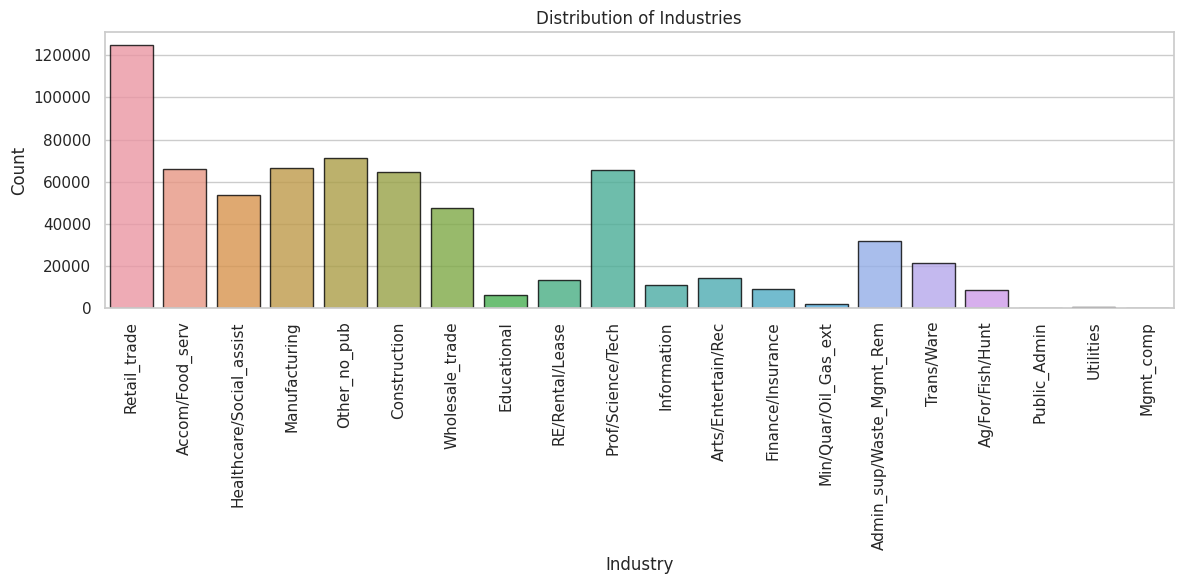

In [39]:
# Plotting the general distribution industry wise

# Convert NAICS column to industry labels
loanData['Industry'] = loanData['NAICS'].map(industry_dict)

# Plotting the industry-wise count
plt.figure(figsize=(12, 6))
sns.countplot(data=loanData, x='Industry', alpha=0.8, edgecolor='black')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Distribution of Industries')
plt.tight_layout()  # Adjust spacing to prevent overlapping labels
plt.show()

Most of the loan have been applied from retail_trade industry

In [40]:
loanData['Industry'].isna().sum() #encountered nan values because in some entried the NAICS value was 0

200951

In [41]:
#removing nan valued rows
loanData = loanData[loanData['Industry'].notna()]

In [42]:
feature = loanData['NAICS'].values
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(feature.reshape(-1, 1))
print("Normalized data:\n", normalized_data)

transformed_NAICS=normalized_data

transformed_NAICS = pd.Series(normalized_data.flatten())

Normalized data:
 [[0.41975309]
 [0.75308642]
 [0.62962963]
 ...
 [0.41975309]
 [0.41975309]
 [0.27160494]]


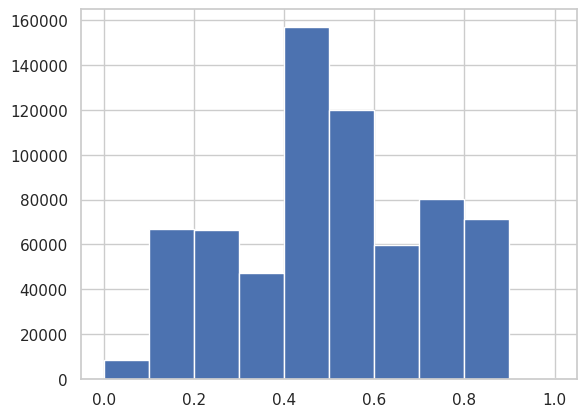

In [43]:
transformed_NAICS.hist()
plt.show()

DOUBLE CHECKING THE HANDLED NULL VALUES SO FAR !!

In [44]:
loanData.isna().sum()

LoanNr_ChkDgt                     0
Name                             10
City                              0
State                             8
Zip                               0
Bank                            622
BankState                       625
NAICS                             0
ApprovalDate                      0
ApprovalFY                        0
Term                              0
NoEmp                             0
NewExist                         83
CreateJob                         0
RetainedJob                       0
FranchiseCode                     0
UrbanRural                        0
RevLineCr                      2326
LowDoc                         1914
ChgOffDate                   535831
DisbursementDate                  0
DisbursementGross                 0
BalanceGross                      0
MIS_Status                        0
ChgOffPrinGr                      0
GrAppv                            0
SBA_Appv                          0
Corrected_AppDate           

In [45]:
loanData.shape

(678107, 31)

#### NewExist column

In [46]:
loanData.loc[(loanData['NewExist']!=1) & (loanData['NewExist']!=2)][['LoanNr_ChkDgt','NewExist']].head()

,LoanNr_ChkDgt,NewExist
170,1001385007,0.0
185,1001485002,0.0
246,1001935006,0.0
269,1002075010,0.0
274,1002115009,0.0


Detected unusual value for this column

In [47]:
loanData['NewExist'] = loanData['NewExist'].fillna(0)

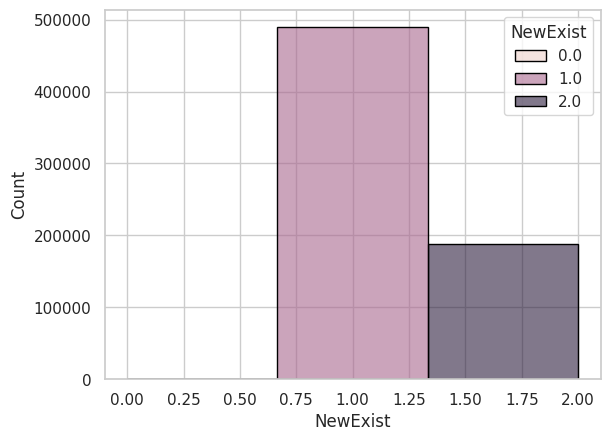

In [48]:
sns.histplot(data=loanData, x='NewExist', kde=True, bins = 3,color = '#ff99c2',alpha = 0.6,hue='NewExist',edgecolor = 'black')
plt.show()

In [49]:
# safe to remove the rows with newexist = 0 as the distribution clearly suggests that the amount in comparison to the rest is very less
loanData = loanData[loanData['NewExist'] > 0]

#### LowDoc

In [50]:
loanData.LowDoc.value_counts()

N    606018
Y     67101
0       676
C       615
A       476
S       438
R        60
1         1
Name: LowDoc, dtype: int64

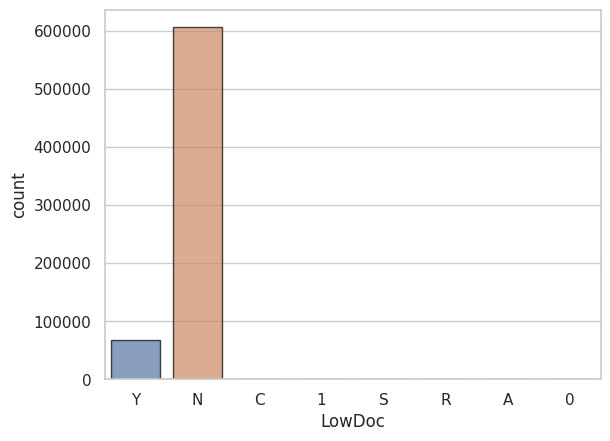

In [51]:
#plotting LowDoc contribution
sns.countplot(data=loanData, x='LowDoc', alpha=0.7, edgecolor = 'black')
plt.show()

In [52]:
#judging by the contribution percentage, its safe to remove the rows having lowdoc other than y and n
loanData = loanData[(loanData['LowDoc']=='Y') | (loanData['LowDoc']=='N')]

In [53]:
#Converting Y = 1 and N = 0
loanData.loc[(loanData['LowDoc']=='Y'), 'LowDoc'] = 1
loanData.loc[(loanData['LowDoc']=='N'), 'LowDoc'] = 0

loanData['LowDoc'] = loanData['LowDoc'].astype(int)

#### City & State

In [54]:
#get all indice where dataframe values for city and state are empty
empty_indices = loanData[loanData['City'].isna() | loanData['State'].isna()].index

In [55]:
pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.5 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6943 sha256=fc3853b90db724b2d87bc6c51224b1765f8fd7725e377debd0355920f43d9d7e
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


In [56]:
from uszipcode import SearchEngine, SimpleZipcode
search = SearchEngine()

def zco(x):
    city = None
    state = None
    if x is not None:
      zipcode = search.by_zipcode(x)
      if (zipcode is not None):
          city = zipcode.major_city
          state = zipcode.state
    return city, state

loanData.loc[empty_indices,['City', 'State']] = loanData.loc[empty_indices,'Zip'].apply(zco).apply(pd.Series).values

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [57]:
loanData.loc[loanData['City'].isna()] #rechecking if any city is still empty

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Corrected_AppDate,Corrected_DisbDate,DisbursementDuration_days,Industry


In [58]:
default_rate = loanData.groupby('State')['MIS_Status'].apply(lambda x: ((x == 0).sum() / len(x))*100)

In [59]:
# Create the chloropleth map
fig = px.choropleth(
    default_rate,
    locations=default_rate.index.tolist(),
    locationmode="USA-states",
    color=default_rate,
    scope="usa",
    color_continuous_scale="Viridis",
    range_color=(0, 35)
)

# Customize the layout
fig.update_layout(
    title_text="Default rate per (US)state",
    geo_scope="usa"
)

# Display the plot
fig.show()


In [60]:
#label encoding both states:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
loanData['State'] = le.fit_transform(loanData['State'])
loanData['BankState'] = le.fit_transform(loanData['BankState'])

#### Rev Line Credit: Revolving line of credit
In general it means that the bank will provide loan for indefinite amount of time untill lender or borrower close their account. If revline credit is active then it somewhere should mean that the borrower is a trustworthy business. Additionally, If a small business has access to a revolving LOC, it may be able to meet its financial obligations and avoid defaulting on payments. Conversely, if a small business lacks access to sufficient capital, it may struggle to meet its financial obligations and increase the likelihood of default.

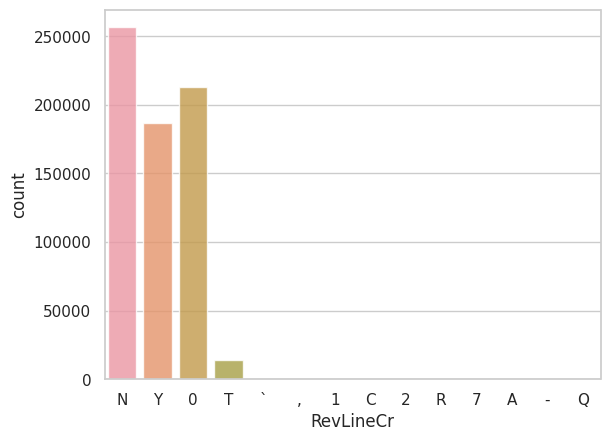

In [61]:
#plotting distribution of this column
sns.countplot(data = loanData, x = 'RevLineCr', alpha = 0.8)
plt.show()

In [62]:
#other than N and Y, there are so many other unique values, better to drop those rows
accepted_rev_list = ['N','Y']
loanData = loanData[loanData['RevLineCr'].isin(accepted_rev_list)]

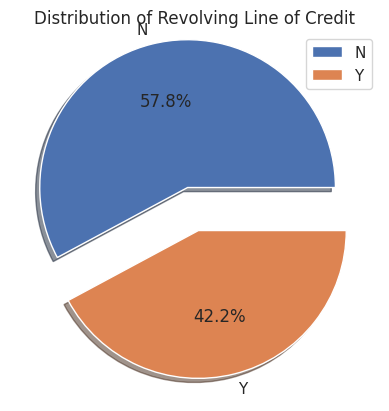

In [63]:
status_counts = loanData['RevLineCr'].value_counts(dropna=False)
myexplode = [0.2, 0.1]
plt.pie(status_counts, labels=status_counts.index.astype(str), autopct='%1.1f%%', explode = myexplode, shadow = True)

plt.title('Distribution of Revolving Line of Credit')
plt.legend()
plt.show()

In [64]:
loanData['RevLineCr'].unique()

array(['N', 'Y'], dtype=object)

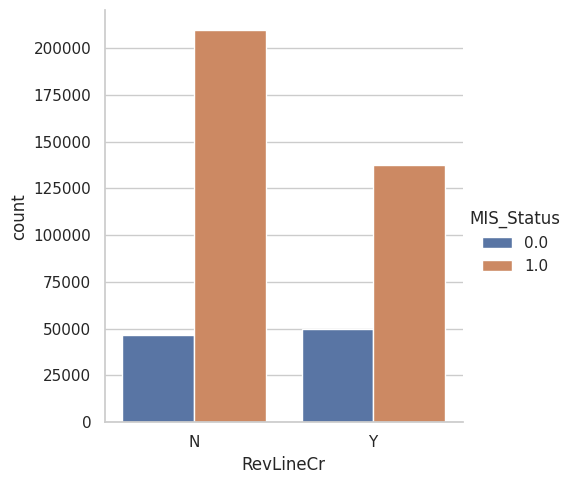

In [65]:
sns.catplot(x="RevLineCr", hue="MIS_Status", kind="count", data=loanData)

In [66]:
# converting Rev Line Cr -->  N:0 Y:1
loanData.loc[(loanData['RevLineCr'] == 'N'), 'RevLineCr'] = 0
loanData.loc[(loanData['RevLineCr'] == 'Y'), 'RevLineCr'] = 1

loanData['RevLineCr'] = loanData['RevLineCr'].astype(int)

#### Franchise code

In [67]:
loanData['FranchiseCode'].unique()

loanData.loc[(loanData['FranchiseCode'] <= 1), 'IsFranchise'] = 0
loanData.loc[(loanData['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [68]:
loanData['IsFranchise'] = loanData['IsFranchise'].astype(int)

#### Lender and Borrowers same state analysis

In [69]:
loanData['SameState'] = (loanData['State'] == loanData['BankState'])

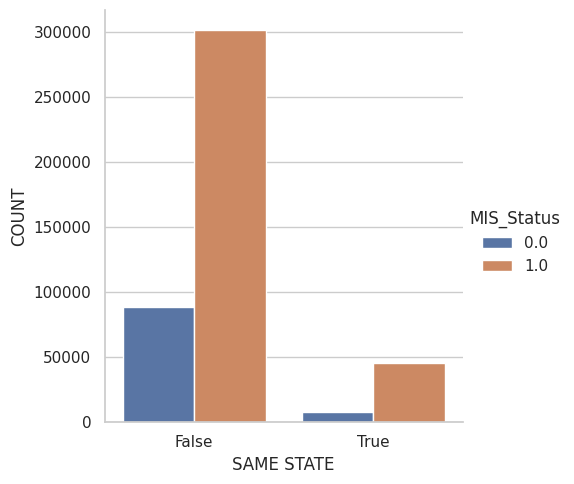

In [70]:
sns.catplot(x="SameState", hue="MIS_Status", kind="count", data=loanData)
plt.xlabel("SAME STATE")
plt.ylabel("COUNT")
plt.show()

In [71]:
loanData.loc[(loanData['SameState']==True), 'SameState'] = 1
loanData.loc[(loanData['SameState']==False), 'SameState'] = 0

loanData['SameState'] = loanData['SameState'].astype(int)

#### SBA Guaranteed Percentage

In [72]:
loanData["SBA_Gurantee_percent"] = loanData["SBA_Appv"]/loanData["GrAppv"]

In [73]:
feature = loanData['SBA_Gurantee_percent'].values
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(feature.reshape(-1, 1))
print("Normalized data:\n", normalized_data)

transformed_SBA_Gurantee_percent=normalized_data

transformed_SBA_Gurantee_percent = pd.Series(normalized_data.flatten())

Normalized data:
 [[0.78947368]
 [0.78947368]
 [0.73684211]
 ...
 [0.73684211]
 [0.47368421]
 [0.73684211]]


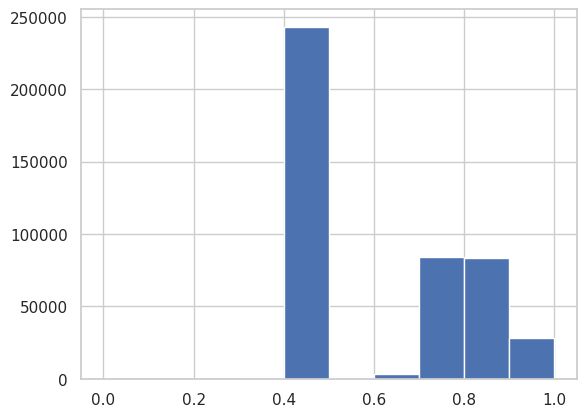

In [74]:
transformed_SBA_Gurantee_percent.hist()
plt.show()

In [75]:
fig = px.box(loanData, x="MIS_Status", y="SBA_Gurantee_percent",notched=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### UrbanRural

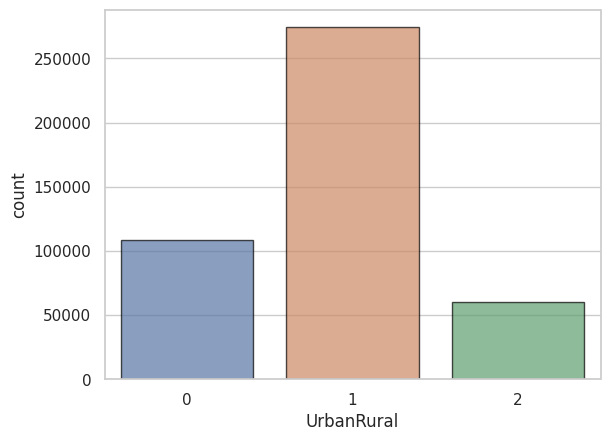

In [76]:
zero_els = np.count_nonzero(loanData['UrbanRural']==0)
sns.countplot(data=loanData, x='UrbanRural', alpha=0.7, edgecolor = 'black')
plt.show()

Almost 24.5% of the values in this column are undefined

### GrAppv

Text(0.5, 1.0, 'Gross Amount Approved in $Million')

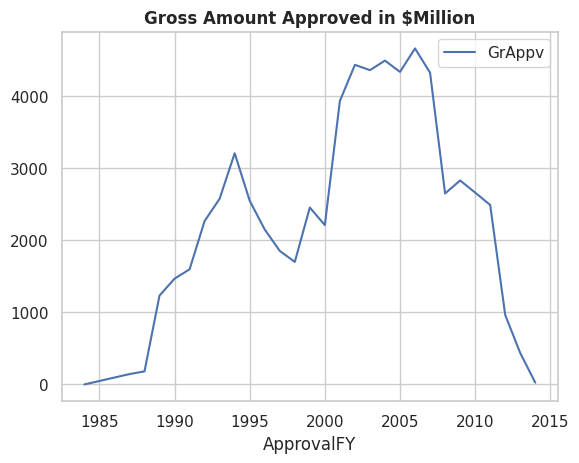

In [77]:
temp=loanData[['ApprovalFY','GrAppv']]
temp = temp.groupby('ApprovalFY').sum()
temp['GrAppv']=temp['GrAppv']/1000000
temp.plot()
plt.title('Gross Amount Approved in $Million',fontweight ="bold")

### IsDisbLargerThanGrAppv

In [78]:
loanData['IsDisbLargerThanGrAppv']=(loanData['DisbursementGross']>loanData['GrAppv']).astype(int)
# A new boolean column that represents if Disbursement Gross is larger than Gross Ammount approved

In [79]:
loanData[(loanData['IsDisbLargerThanGrAppv']==1)][['DisbursementGross','GrAppv','DisbursementDuration_days','SBA_Gurantee_percent']]

,DisbursementGross,GrAppv,DisbursementDuration_days,SBA_Gurantee_percent
28,438541.0,100000.0,21.0,0.5
30,51440.0,35000.0,21.0,0.5
34,63076.0,25000.0,113.0,0.5
65,78218.0,30000.0,21.0,0.5
67,60859.0,20000.0,21.0,0.5
...,...,...,...,...
897834,85000.0,75000.0,106.0,0.5
897841,109363.0,100000.0,14.0,0.5
898003,217287.0,100000.0,71.0,0.8
898395,42600.0,35000.0,252.0,0.5


### Full TimePeriod Analysis

<ipython-input-80-d6a83169d659>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



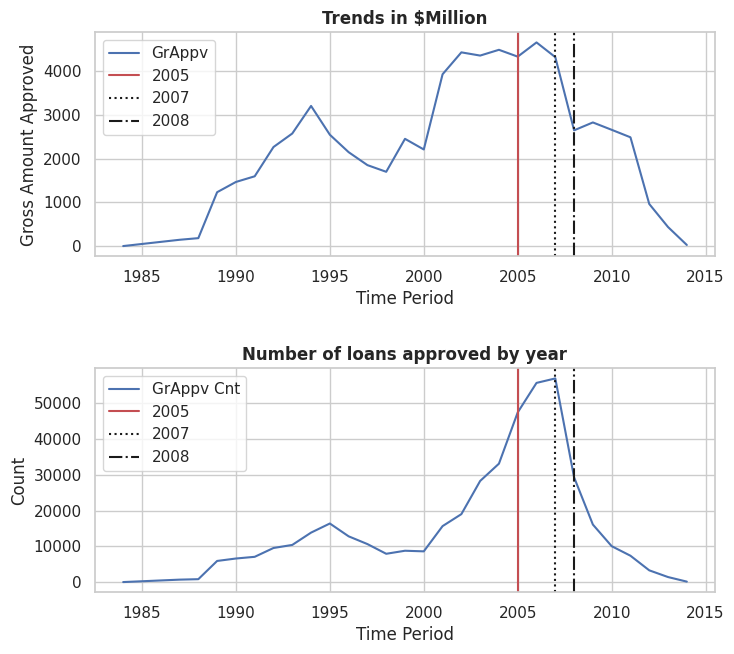

In [80]:
grouped = loanData.groupby('ApprovalFY').sum()
grouped['GrAppv']=grouped['GrAppv']/1000000
grouped_size = loanData.groupby('ApprovalFY').size()

fig, (ax1,ax2) = plt.subplots(2,1, figsize = (8,8))
ax1.plot(grouped.index, grouped['GrAppv'], label='GrAppv')
ax1.axvline(x=2005, color='r', label = '2005')
ax1.axvline(x=2007, color='k', linestyle='dotted', label = '2007')
ax1.axvline(x=2008, color='k', linestyle='dashdot', label = '2008')
ax1.legend()
ax1.set_title('Trends in $Million',fontweight ="bold")
ax1.set_ylabel("Gross Amount Approved")
ax1.set_xlabel("Time Period")

ax2.plot(grouped_size.index, grouped_size.values, label='GrAppv Cnt')
ax2.axvline(x=2005, color='r', label = '2005')
ax2.axvline(x=2007, color='k', linestyle='dotted', label = '2007')
ax2.axvline(x=2008, color='k', linestyle='dashdot', label = '2008')
ax2.legend()
ax2.set_title('Number of loans approved by year',fontweight ="bold")
ax2.set_ylabel("Count")
ax2.set_xlabel("Time Period")

plt.subplots_adjust(bottom=0.2,
                    top=0.9,
                    hspace=0.5)

plt.show()

### NrOfDefaultDays

In [ ]:
default_df = loanData[loanData['ChgOffDate'].notna()]
default_df['NrOfDefaultDays']= pd.to_datetime(default_df['ChgOffDate']) - default_df['Corrected_DisbDate']

<ipython-input-345-75cc474ecdee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouped_data = default_df.groupby('NewExist')['NrOfDefaultDays'].mean().reset_index()
grouped_data['NrOfDefaultDays'] = grouped_data['NrOfDefaultDays'].apply(lambda x : x.days)
category_names = {1.0: 'Existing Business', 2.0: 'New Business'}
grouped_data['NewExist'] = grouped_data['NewExist'].map(category_names)

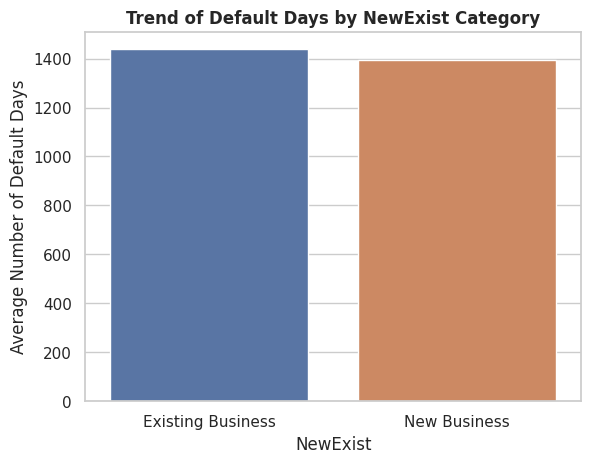

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x='NewExist', y='NrOfDefaultDays', data = grouped_data)
plt.xlabel('NewExist')
plt.ylabel('Average Number of Default Days')
plt.title('Trend of Default Days by NewExist Category', fontweight ="bold")
plt.show()

### ChgOffPrinGr

In [ ]:
chg_off_df = loanData[loanData['ChgOffDate'].notna()][['ChgOffDate','ChgOffPrinGr']]
chg_off_df['ChgOffDate'] = pd.to_datetime(chg_off_df['ChgOffDate']).apply(lambda x: x.year)
chg_off_df = chg_off_df.groupby('ChgOffDate').sum()

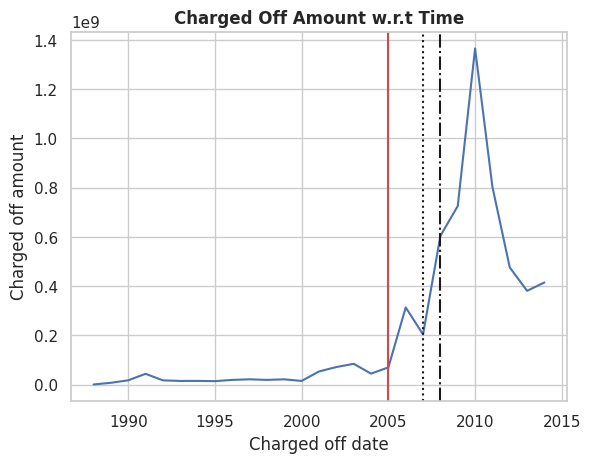

In [ ]:
sns.set_theme(style="whitegrid")
sns.lineplot(data = chg_off_df, x = 'ChgOffDate', y = 'ChgOffPrinGr')
plt.axvline(x=2005, color='r', label = '2005')
plt.axvline(x=2007, color='k', linestyle='dotted', label = '2007')
plt.axvline(x=2008, color='k', linestyle='dashdot', label = '2008')
plt.ylabel("Charged off amount")
plt.xlabel("Charged off date")
plt.title("Charged Off Amount w.r.t Time", fontweight ="bold")
plt.show()

### Loan Term

Distribution of loan term in months.
We see that around 100, 250 and 300 month marks, there are popular loan terms. Since the term of the loan is a function of the expected lifetime of the assets, loans backed by real estate will have terms 20 years or greater (240 months) and are the only loans granted for such a long term, whereas loans not backed by real estate will have terms less than 20 years.

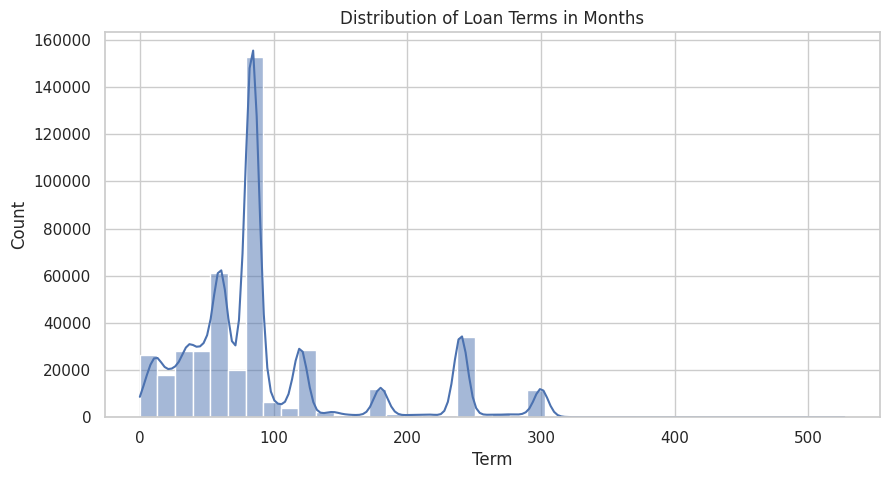

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(loanData['Term'], bins = 40,kde=True)
plt.title('Distribution of Loan Terms in Months')
plt.ylabel('Count')
plt.show()

 Below is the distribution of Average SBA Loan Disbursement by Industry. We notice, that Agriculture, forestry, fishing and hunting Industries have taken more loans than any other in this time period.

<ipython-input-351-661f781bcb4d>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-351-661f781bcb4d>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



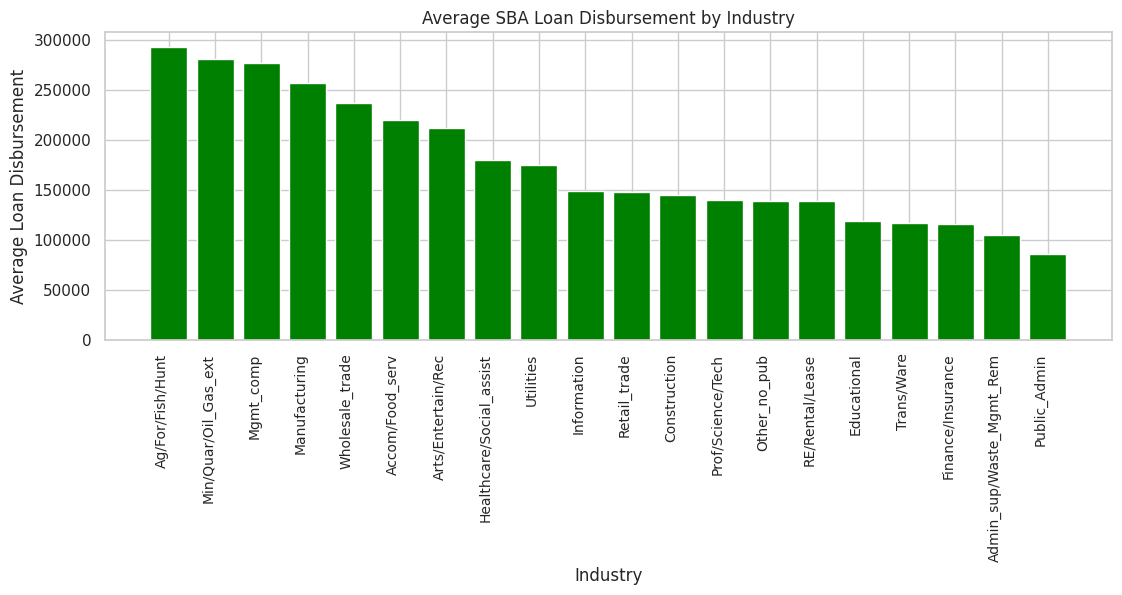

In [ ]:
industry_group = loanData.groupby(['Industry'])

loanData_industryAverage = industry_group.mean().sort_values('DisbursementGross', ascending=False) 
fig = plt.figure(figsize=(13,4))

ax = fig.add_subplot(1, 1, 1)
ax.bar(loanData_industryAverage.index, loanData_industryAverage['DisbursementGross'], color = 'green')
ax.set_xticklabels(loanData_industryAverage.index, rotation=90, horizontalalignment='right', fontsize=10)

ax.set_title('Average SBA Loan Disbursement by Industry')
ax.set_xlabel('Industry')
ax.set_ylabel('Average Loan Disbursement')

plt.show()

### Loan Maturity

In [ ]:
days = loanData['Term'].apply(lambda x: x*30)
loanData['Loan_Maturity_Date'] = loanData['Corrected_DisbDate']+ days.apply(lambda x : timedelta(days = x))

In [ ]:
loanData.shape

(443436, 36)

Since, there is no possible way that it can be analysed whether a loan 
was deault or not before it even matured . Hence, we keep only the entries which have a matured before 2014

In [ ]:
loanData = loanData[loanData['Loan_Maturity_Date'].apply(lambda x : x.year) < 2014]

### Selecting Recession Free Time period
1990-2006

In [ ]:
loanData = loanData[(loanData['ApprovalFY']>=1990) & (loanData['ApprovalFY']<=2006)]

### Dropping columns

In [ ]:
#checking number of entries left
loanData.shape

(258580, 36)

In [ ]:
loanData.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'Corrected_AppDate', 'Corrected_DisbDate', 'DisbursementDuration_days',
       'Industry', 'IsFranchise', 'SameState', 'SBA_Gurantee_percent',
       'IsDisbLargerThanGrAppv', 'Loan_Maturity_Date'],
      dtype='object')

Some columns can be dropped from here without further analysis since they will anyways not make that much of an effect as part of our classification task.

In [ ]:
loanData.drop(columns = ['LoanNr_ChkDgt','Name','City','Bank','UrbanRural','FranchiseCode','Industry','Zip', 'ChgOffDate','Loan_Maturity_Date','ApprovalFY','ApprovalDate','DisbursementDate','Corrected_DisbDate','Corrected_AppDate'], inplace = True)

In [ ]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(loanData, title="Profiling Report")
# profile.to_file('loan_data.html')

In [ ]:
loanData.isna().sum()

State                        0
BankState                    0
NAICS                        0
Term                         0
NoEmp                        0
NewExist                     0
CreateJob                    0
RetainedJob                  0
RevLineCr                    0
LowDoc                       0
DisbursementGross            0
BalanceGross                 0
MIS_Status                   0
ChgOffPrinGr                 0
GrAppv                       0
SBA_Appv                     0
DisbursementDuration_days    0
IsFranchise                  0
SameState                    0
SBA_Gurantee_percent         0
IsDisbLargerThanGrAppv       0
dtype: int64

In [ ]:
#Analysing Balance gross: since most of its values is 0
loanData[loanData["BalanceGross"]>0]
#found one such record, we can drop this anomaly as well by removing BalanceGross

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,...,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DisbursementDuration_days,IsFranchise,SameState,SBA_Gurantee_percent,IsDisbLargerThanGrAppv
518257,49,16,71,249,1,2.0,0,0,0,0,...,1760.0,1.0,0.0,245000.0,183750.0,53.0,0,0,0.75,0


In [ ]:
loanData.drop(columns = ['BalanceGross'], inplace = True)
loanData.reset_index(drop = True)

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DisbursementDuration_days,IsFranchise,SameState,SBA_Gurantee_percent,IsDisbLargerThanGrAppv
0,16,37,45,84,4,2.0,0,0,0,1,60000.0,1.0,0.0,60000.0,48000.0,730.0,0,0,0.80,0
1,16,17,72,60,2,2.0,0,0,0,1,40000.0,1.0,0.0,40000.0,32000.0,92.0,0,0,0.80,0
2,16,17,62,180,7,1.0,0,0,0,0,287000.0,1.0,0.0,287000.0,215250.0,306.0,0,0,0.75,0
3,7,9,33,120,19,1.0,0,0,0,0,517000.0,1.0,0.0,517000.0,387750.0,122.0,0,0,0.75,0
4,10,1,81,84,1,2.0,0,0,0,1,45000.0,1.0,0.0,45000.0,36000.0,487.0,0,0,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258575,5,5,45,84,3,1.0,0,0,0,1,85000.0,1.0,0.0,85000.0,68000.0,62.0,0,1,0.80,0
258576,21,5,23,60,5,1.0,0,0,1,0,25000.0,1.0,0.0,25000.0,12500.0,32.0,0,0,0.50,0
258577,5,5,31,36,40,1.0,0,0,0,0,200000.0,1.0,0.0,200000.0,150000.0,32.0,0,1,0.75,0
258578,36,16,45,60,6,1.0,0,0,1,0,85000.0,1.0,0.0,85000.0,42500.0,246.0,0,0,0.50,0


In [ ]:
loanData.shape

(258580, 20)

In [ ]:
col = loanData.pop("MIS_Status")
loanData.insert(len(loanData.columns), 'MIS_Status', col)


<ipython-input-369-f5b166abba24>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

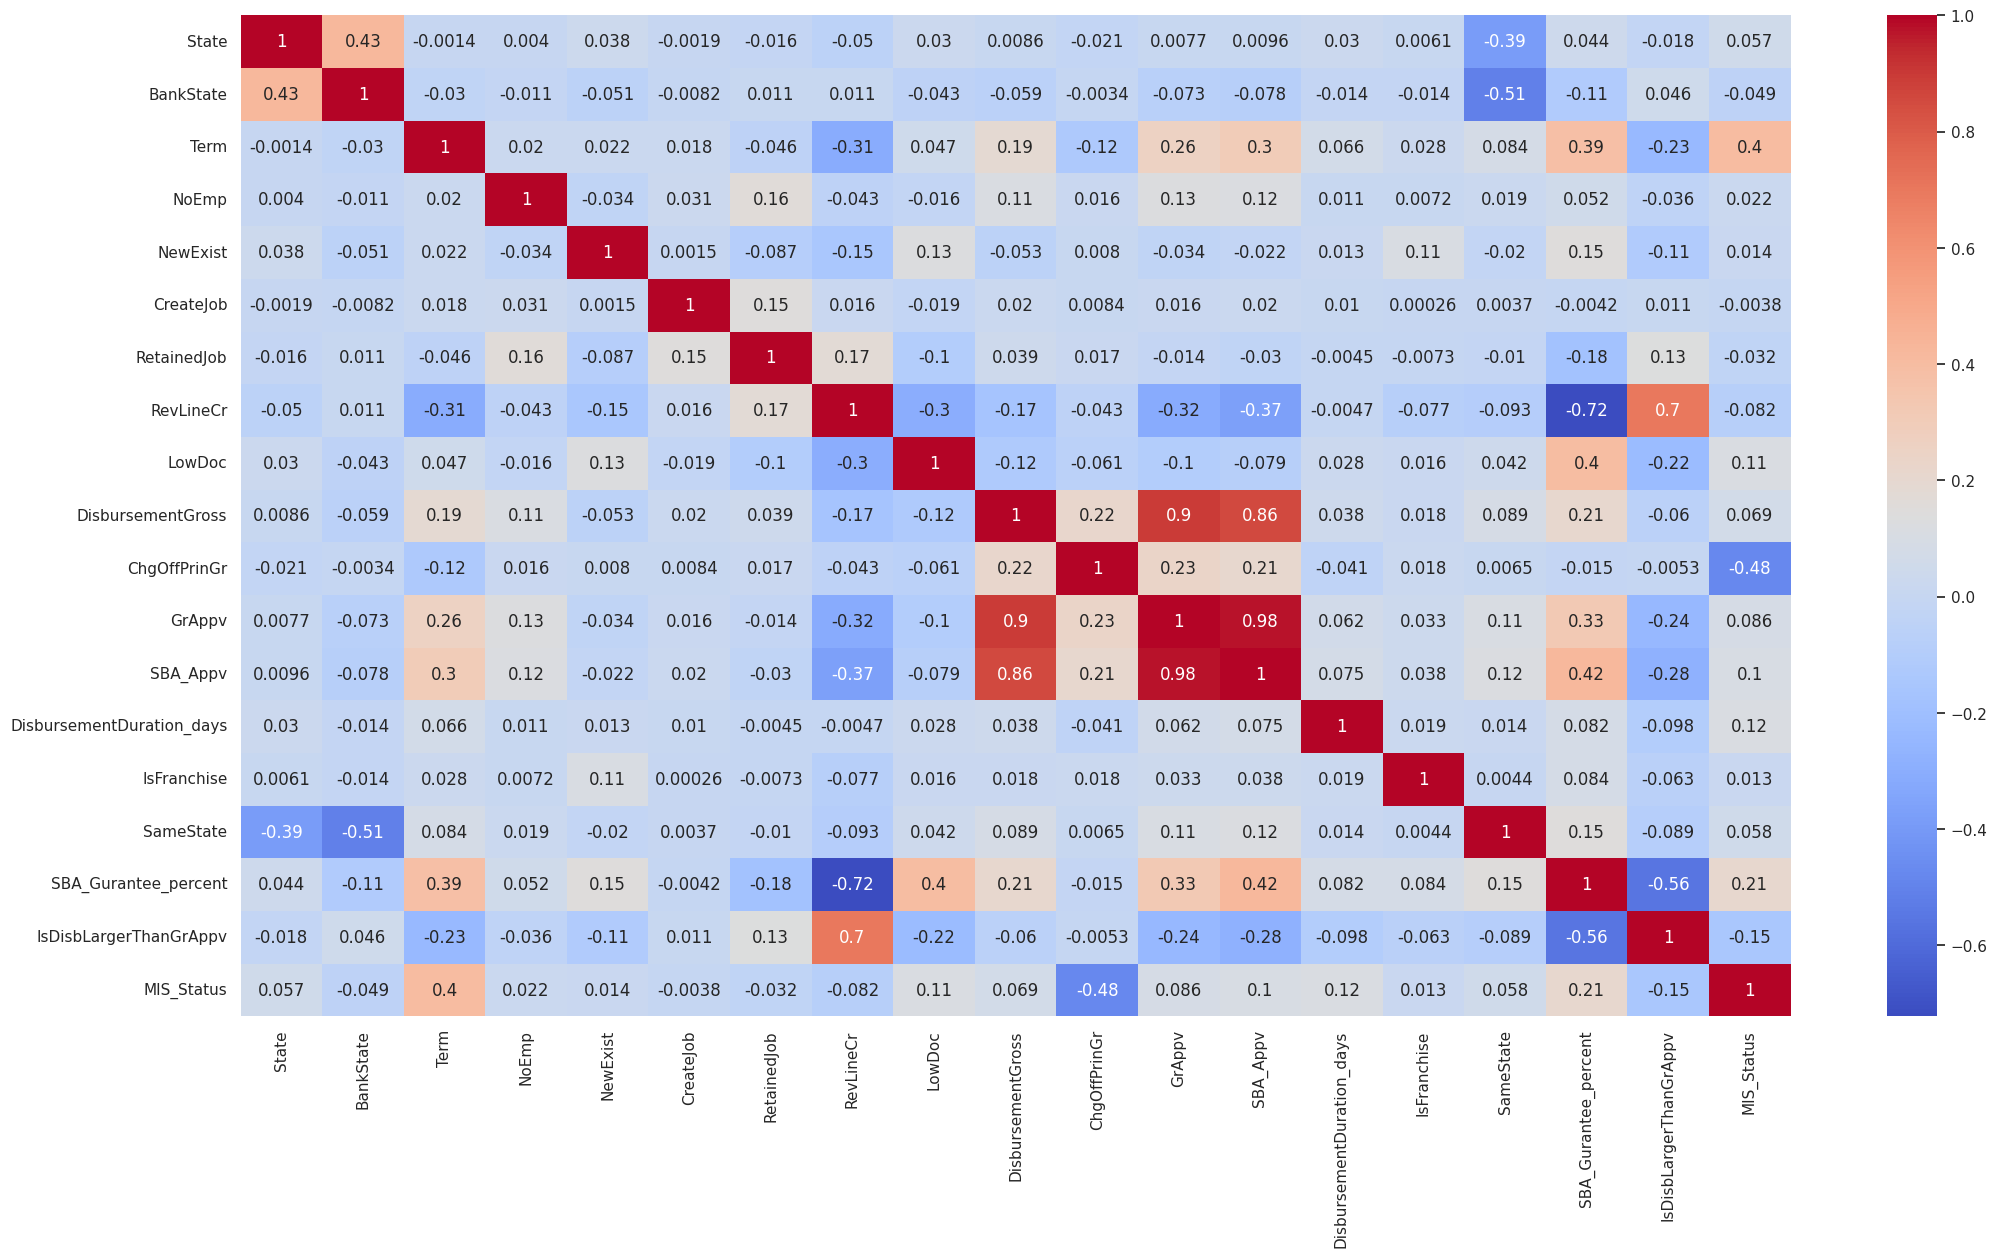

In [ ]:
#correlation matrix

corr_matrix = loanData.corr()
plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<ipython-input-374-d93088da833d>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

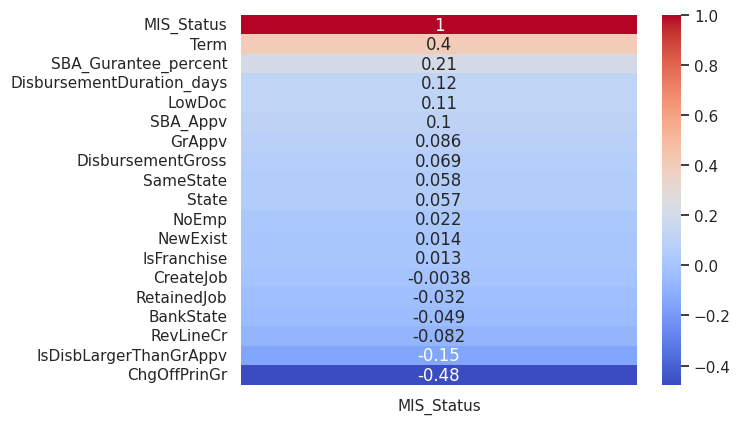

In [ ]:
#Checking the Correlation of every variable with "MIS_Status"
target_var = 'MIS_Status'
corr_matrix = loanData.corr()[[target_var]]
corr_matrix = corr_matrix.sort_values(by=target_var, ascending=False)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

After the update, the correlation between the "Term" column and "MIS_Status" strengthened, with its value increasing from 0.31 to 0.4. Meanwhile, the correlation of the "NewExist" column shifts from negative to positive (-0.02 to 0.014).

In [ ]:
loanData.head()

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,DisbursementDuration_days,IsFranchise,SameState,SBA_Gurantee_percent,IsDisbLargerThanGrAppv,MIS_Status
0,16,37,45,84,4,2.0,0,0,0,1,60000.0,0.0,60000.0,48000.0,730.0,0,0,0.80,0,1.0
1,16,17,72,60,2,2.0,0,0,0,1,40000.0,0.0,40000.0,32000.0,92.0,0,0,0.80,0,1.0
2,16,17,62,180,7,1.0,0,0,0,0,287000.0,0.0,287000.0,215250.0,306.0,0,0,0.75,0,1.0
5,7,9,33,120,19,1.0,0,0,0,0,517000.0,0.0,517000.0,387750.0,122.0,0,0,0.75,0,1.0
7,10,1,81,84,1,2.0,0,0,0,1,45000.0,0.0,45000.0,36000.0,487.0,0,0,0.80,0,1.0


In [ ]:
loanData.to_csv('/content/drive/MyDrive/DM1 Project/CleanedData/cleanLoanData.csv')